## Procesamiento de Imágenes - Diplodatos 2022

Trabajo Práctico

Importante: Para obtener los créditos de materia completa, resolver al menos 1 ejercicio optativo de cada trabajo práctico.

In [1]:
integrantes = ["Daniel A. Dos Santos", "Natalia Rubio", "Sebastián Coca"]
print(*integrantes, sep="\n")


Daniel A. Dos Santos
Natalia Rubio
Sebastián Coca


Importar las librerías necesarias

In [2]:
%%capture
!pip install --upgrade ipywidgets

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from matplotlib.image import imread
import cv2
import PIL
import urllib

# for interactivity
#from ipywidgets import Output, Label, interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

In [4]:
widgets.__version__

'8.1.1'

Abrir imágenes de demo incluídas en la biblioteca. Para evitar cargar desde disco, pueden utilizar estas imágenes para resolver el TP. Si utilizan otras adjuntarlas en la entrega para reproducibilidad.

<ipython-input-5-3b43e2052089>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('imageio:'+eleccion)


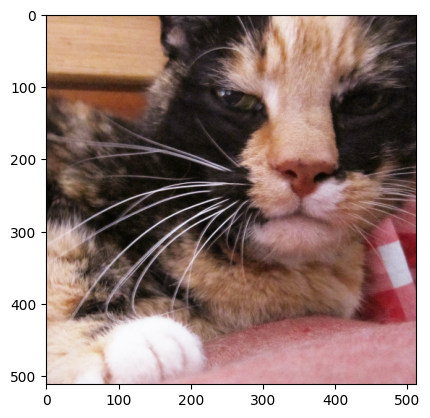

<ipython-input-5-3b43e2052089>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_g = imageio.imread('imageio:'+eleccion2)


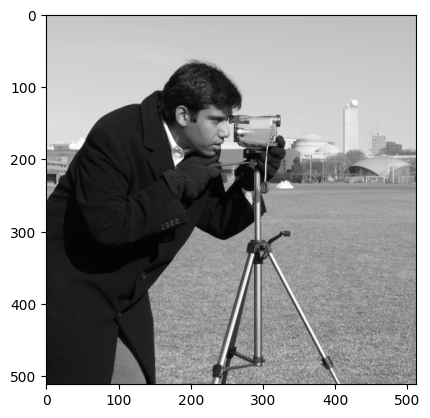

In [5]:
eleccion = 'wikkie.png'
img = imageio.imread('imageio:'+eleccion)
plt.imshow(img)
plt.show()

eleccion2 = 'camera.png'
img_g = imageio.imread('imageio:'+eleccion2)
plt.imshow(img_g, 'gray')
# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

## Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

In [6]:
#@title Funciones varias

# Límites de los canales
Ylim = np.array([0,1])
Ilim = np.array([-0.5957, 0.5957])
Qlim = np.array([-0.5226, 0.5226])
RGBlim = np.array([0, 255])



def lim_norm(img,filtro):
  new_img = np.empty(np.shape(img))
  if(filtro == 'YIQ'):
    new_img[:,:,0] = np.clip(img[:,:,0], Ylim[0], Ylim[1])
    new_img[:,:,1] = np.clip(img[:,:,1], Ilim[0], Ilim[1])
    new_img[:,:,2] = np.clip(img[:,:,2], Qlim[0], Qlim[1])
    #new_img[:,:,0] = np.where(img[:,:,0] > Ylim[1], Ylim[1], img[:,:,0])
    #new_img[:,:,0] = np.where(img[:,:,0] < Ylim[0], Ylim[0], img[:,:,0])
    #new_img[:,:,1] = np.where(img[:,:,1] > Ilim[1], Ilim[1], img[:,:,1])
    #new_img[:,:,1] = np.where(img[:,:,1] < Ilim[0], Ilim[0], img[:,:,1])
    #new_img[:,:,2] = np.where(img[:,:,2] > Qlim[1], Qlim[1], img[:,:,2])
    #new_img[:,:,2] = np.where(img[:,:,2] < Qlim[0], Qlim[0], img[:,:,2])
  elif(filtro == 'RGB'):
    new_img = np.clip(img, RGBlim[0], RGBlim[1])
    #new_img = np.where(img > RGBlim[1], RGBlim[1], img)
    #new_img = np.where(img < RGBlim[0], RGBlim[0], img)
  else:
    new_img = np.clip(img, Ylim[0], Ylim[1])
    #new_img = np.where(img > Ylim[1], Ylim[1], img)
    #new_img = np.where(img < Ylim[0], Ylim[0], img)
  #print('lim_norm', np.max(new_img), np.min(new_img))
  return new_img

def transform(img, M):
  """
  Transformación de una imagen (img) con una matriz (M)
  """
  return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
  return transform(img, MAT_RGB2YIQ)


def yiq2rgb(img):
  #return transform(img, np.linalg.inv(MAT_RGB2YIQ))
  return transform(img, MAT_YIQ2RGB)

def info(img):
  return print(f'Imagen: {eleccion}\n',
               f'shape: {img.shape} -',
               f'type: {img.dtype}\n',
               f'valor mínimo: {np.min(img)} y máximo: {np.max(img)}',
               )

def info_canales(img, *args):
  min0 = np.min(img[:,:,0]); max0 = np.max(img[:,:,0])
  min1 = np.min(img[:,:,1]); max1 = np.max(img[:,:,1])
  min2 = np.min(img[:,:,2]); max2 = np.max(img[:,:,2])
#  if(args[0]):
#    if(args[1] == 'YIQ'):
#      print('lalal')
#
#    elif(args[1] == 'RGB'):
#      print('lelele')
#
#    else:
#      print('lilili')
#
  return print('\nInformación de los canales:\n',
               f'Canal 0: {min0}, {max0}\n',
               f'Canal 1: {min1}, {max1}\n',
               f'Canal 2:  {min2}, {max2}\n',
               )


def plot_hist(im, bins, ax, cumulative=False):
    """
    im: imanen RGB o canal Y
    bins: número de bins para el histograma
    ax: eje para el gráfico
    cumulative: si es o no cumulativo el histograma (default: False )
    """
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

# === Matrices de Transformación ===

# en las filminas poseen otros
# src: https://en.wikipedia.org/wiki/YIQ
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.5959,-0.2746,-0.3213],
                        [0.2115,-0.5227, 0.3112]])

MAT_YIQ2RGB = np.array([[1, 0.956, 0.619],
                        [1, -0.272, -0.647],
                        [1, -1.106, 1.703]])

M_R = np.array([[1, 0, 0],
              [0, 0, 0],
              [0, 0, 0]])

M_G = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])

M_B = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 1]])

M_gray = np.ones((3,3))/3

# Y [0,1]; I @ [-0.5957, 0.5957] y Q @ [-0.5226, 0.5226].
# ===================================
#np.linalg.inv(MAT_RGB2YIQ), MAT_YIQ2RGB


### Se juega con la imagen

In [7]:
# info de la imagen
info(img)

# Para pasar a YIQ primero hay que normalizar

img_rgb = img / 255
info(img_rgb)
info_canales(img_rgb)

Imagen: wikkie.png
 shape: (512, 512, 3) - type: uint8
 valor mínimo: 0 y máximo: 254
Imagen: wikkie.png
 shape: (512, 512, 3) - type: float64
 valor mínimo: 0.0 y máximo: 0.996078431372549

Información de los canales:
 Canal 0: 0.011764705882352941, 0.9882352941176471
 Canal 1: 0.00784313725490196, 0.9921568627450981
 Canal 2:  0.0, 0.996078431372549



float64
[0.         0.         0.10980392]


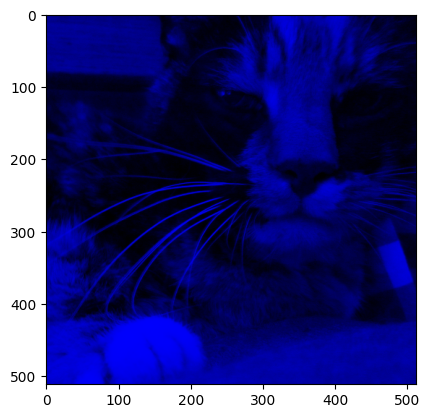

0.13202614379084968


Text(0.5, 1.0, 'Canal azul')

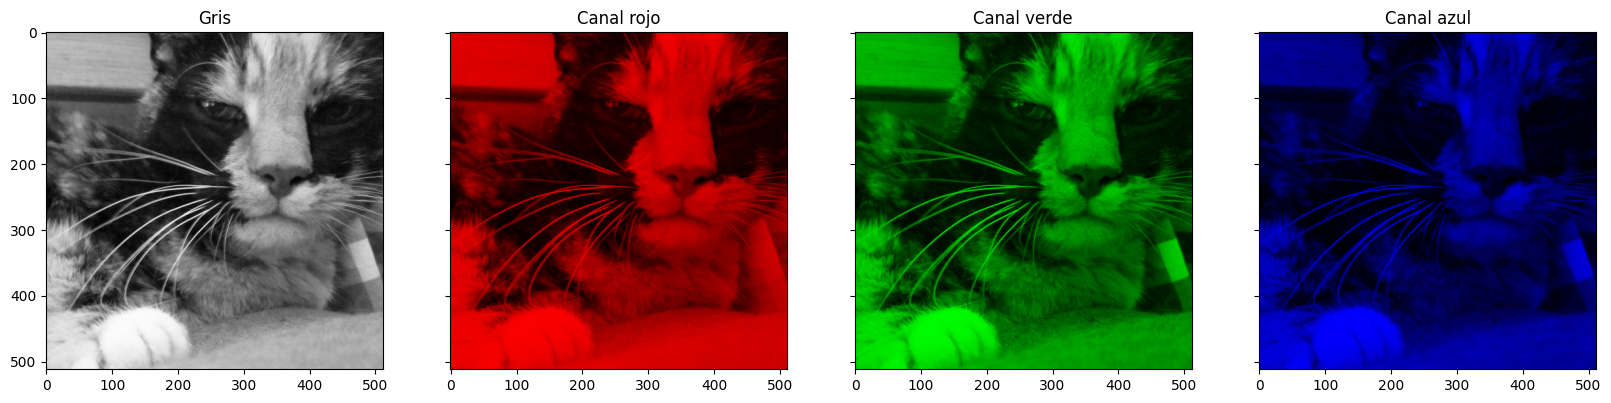

In [8]:
# Análisis por canal

# gris
img_gris = transform(img_rgb, M_gray)
print(img_gris.dtype)

#plt.imshow(img_gris)
#plt.show()

# rgb
img_c = transform(img_rgb, M_B)

print(img_c[300,150])

plt.imshow(img_c)
plt.show()

#
img_gris_2 = img_gris[:,:,0]

#plt.imshow(img_gris_2, 'gray')
print(img_gris_2[300,150])

fig, ax = plt.subplots(1,4, figsize=(20,5), sharey=True)

ax[0].imshow(img_gris)
ax[1].imshow(transform(img_rgb, M_R))
ax[2].imshow(transform(img_rgb, M_G))
ax[3].imshow(transform(img_rgb, M_B))
ax[0].set_title('Gris')
ax[1].set_title('Canal rojo')
ax[2].set_title('Canal verde')
ax[3].set_title('Canal azul')

Imagen: wikkie.png
 shape: (512, 512, 3) - type: float64
 valor mínimo: -0.07358549019607843 y máximo: 0.9902588235294117

Información de los canales:
 Canal 0: 0.010423529411764705, 0.9902588235294117
 Canal 1: -0.07358549019607843, 0.28381529411764705
 Canal 2:  -0.03267725490196081, 0.12652039215686273



Text(0.5, 1.0, 'Canal Q')

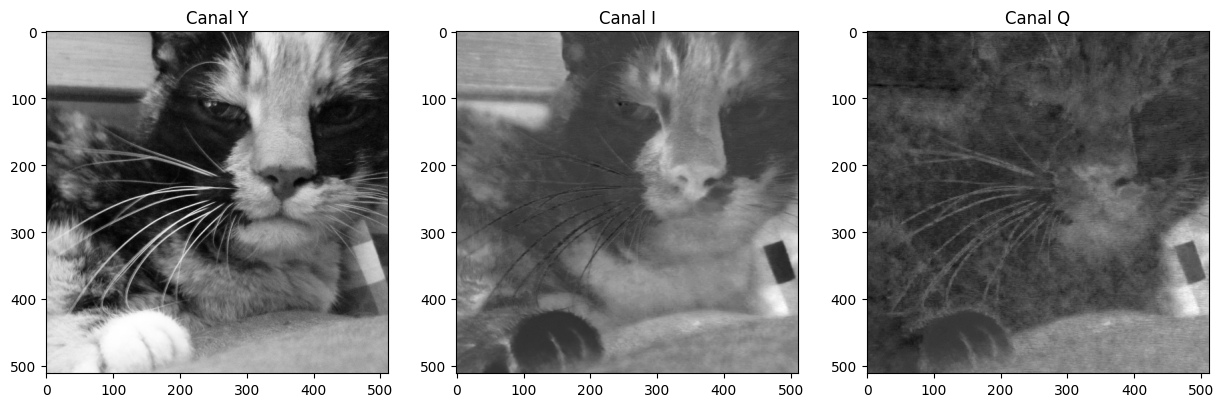

In [9]:
# Transformación a YIQ

img_yiq = rgb2yiq(img_rgb)
info(img_yiq)
info_canales(img_yiq)

cY = img_yiq[:,:,0]
cI = img_yiq[:,:,1]
cQ = img_yiq[:,:,2]

# Visualización de los 3 canales
fig, [x0, x1, x2] = plt.subplots(1,3, figsize=(15,10))

x0.imshow(cY, 'gray')
x0.set_title('Canal Y')
x1.imshow(cI, 'gray')
x1.set_title('Canal I')
x2.imshow(cQ, 'gray')
x2.set_title('Canal Q')

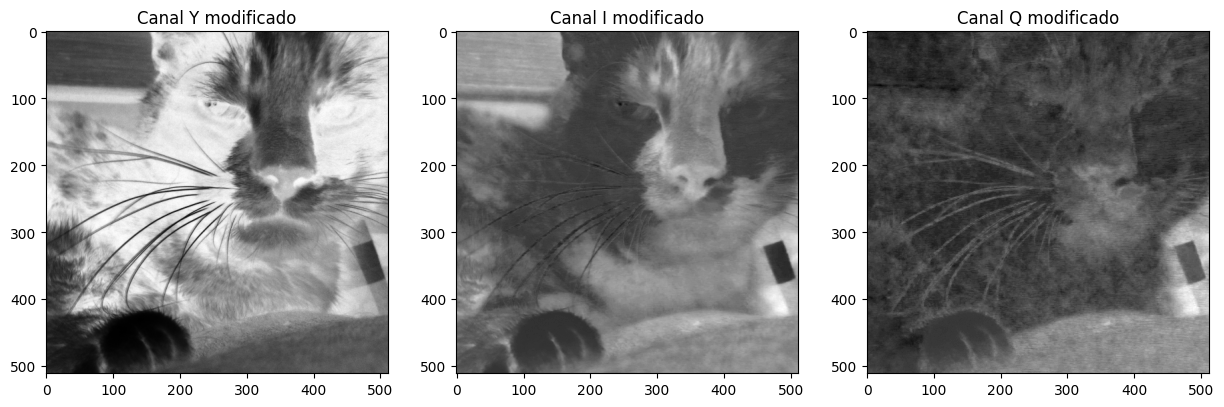


Información de los canales:
 Canal 0: 0.009741176470588253, 0.9895764705882353
 Canal 1: -0.14717098039215687, 0.5676305882352941
 Canal 2:  -0.06535450980392161, 0.25304078431372545


Información de los canales:
 Canal 0: -0.0021468847058824657, 1.4373307474509804
 Canal 1: 0.009083093333333379, 0.9941303105882353
 Canal 2:  -0.15417038745098047, 1.029607136470588


Información de los canales:
 Canal 0: 0.0, 1.0
 Canal 1: 0.009083093333333379, 0.9941303105882353
 Canal 2:  0.0, 1.0



Text(0.5, 1.0, 'Imagen modificada')

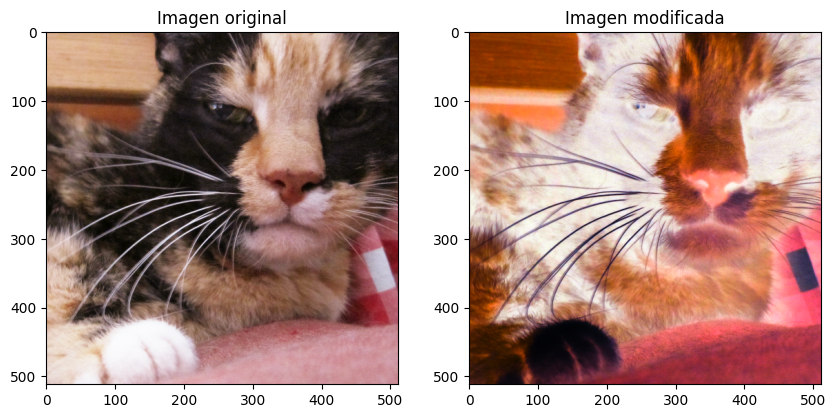

In [10]:
#@title Modificación de los canales YIQ

def alpha(canal):
  al = 2
  #return al * canal
  return np.abs(1 - canal)

def beta(canal):
  be = 2
  return be * canal


ncY = alpha(cY)
ncI = beta(cI)
ncQ = beta(cQ)
#np.power(cQ,2)# cQ * cQ (son equivalentes)

fig, [x0, x1, x2] = plt.subplots(1,3, figsize=(15,10))

x0.imshow(ncY, 'gray')
x0.set_title('Canal Y modificado')
x1.imshow(ncI, 'gray')
x1.set_title('Canal I modificado')
x2.imshow(ncQ, 'gray')
x2.set_title('Canal Q modificado')
plt.show()

newimg_yiq = np.empty(img_yiq.shape)

newimg_yiq[:,:,0] = ncY
newimg_yiq[:,:,1] = ncI
newimg_yiq[:,:,2] = ncQ

info_canales(newimg_yiq)

info_canales(yiq2rgb(newimg_yiq))
newimg_rgb = np.clip(yiq2rgb(newimg_yiq), 0, 1)
info_canales(newimg_rgb)



fig, [x0, x1] = plt.subplots(1,2, figsize=(10,5))

x0.imshow(img_rgb)
x0.set_title('Imagen original')
x1.imshow(newimg_rgb)
x1.set_title('Imagen modificada')



## Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

In [11]:
#@title Filtros

def change_hist(img, tipo, filtro, *dom):
  """
  Función para transformar una imagen (img) en base al filtro que se le pasa.
  img: Se introduce imagen RGB, YIQ o canal Y
  tipo: se especifica el tipo de imagen (opciones: RGB, YIQ, Y)
  filtro: tipo de filtrado que se aplica
  *dom: pueden ser los límites del filtro lineal a trozos:
        dom[0:2] = np.array([xmin, xmax])
        dom[2:4] = np.array([ymin, ymax])
        o la potencia para aplicar:
        dom[0] = potencia
  En todos los casos sale de la elección del filtro y los datos seleccionados
  """
  # verificación que img tiene dim 2 al menos
  if(img.ndim < 2):
    return 'Advertencia: la imagen debe ser una matriz. ¡No se puede realizar el filtrado de la imagen!'
  # normalización de la imagen y obtención del canal a analizar
  if(tipo == 'RGB'):
    if(np.max(img) > 2):
      canal_Y = rgb2yiq(img / 255)[...,0]#.flatten()
      canal_IQ = rgb2yiq(img / 255)[...,1:3]
    else:
      canal_Y = rgb2yiq(img)[...,0]#.flatten()
      canal_IQ = rgb2yiq(img)[...,1:3]
  elif(tipo == 'YIQ'):
    canal_Y = img[:,:,0]#.flatten()
    canal_IQ = img[...,1:3]
  elif(tipo == 'Y'):
    canal_Y = img#.flatten()
  # Construcción del filtro y su cálculo
  if( np.size(dom) > 1):
    xmin = dom[0][0]
    xmax = dom[0][1]
    ymin = dom[0][2]
    ymax = dom[0][3]
    #canal_YF = np.reshape(
    canal_YF = filtrado(canal_Y, filtro, xmin, xmax, ymin, ymax)#, img.shape )
  elif( np.size(dom) == 1):
    potencia = dom
    canal_YF = filtrado(canal_Y, filtro, potencia)
  else:
    canal_YF = filtrado(canal_Y, filtro)
  # Reconstrucción de la imagen modificada
  img_new = np.empty(img.shape)
  if(tipo == 'RGB'):
    img_new[...,0] = canal_YF
    img_new[...,1:3] = canal_IQ
    new_img = yiq2rgb(img_new)#*RGBlim[1] # se lleva a [0,255]
  elif(tipo == 'YIQ'):
    img_new[...,0] = canal_YF
    img_new[...,1:3] = canal_IQ
    new_img = img_new
  elif(tipo == 'Y'):
    img_new = canal_YF
    new_img = img_new
  #new_img = lim_norm(new_img, tipo)
  return canal_Y, canal_YF, lim_norm(new_img, tipo)


def imagen_filtrada(canal_YF, forma, tipo, *args):
  img_yiqF = np.empty(forma)
  if(tipo == 'Y'):
    img_yiqF = canal_YF
  elif(tipo == 'YIQ'):
    img_yiqF[:,:,0] = canal_YF
    img_yiqF[:,:,1:3] =  args[0]
  elif(tipo == 'RGB'):
    print('No disponible por ahora - agregar')
  return img_yiqF


def filtrado(canal_Y, filtro, *args):
  """
  Filtro para trabajar con el canal Y
  """
  if(filtro == 'raíz'):
    canal_YF = np.sqrt(canal_Y)
  elif(filtro == 'cuadrado'):
    canal_YF = canal_Y * canal_Y
  elif(filtro == 'potencia'):
    canal_YF = np.power(canal_Y, args)
  elif(filtro == 'lineal a trozos'):
    xmin = args[0]
    xmax = args[1]
    ymin = args[2]
    ymax = args[3]
    canal_YF = np.empty(canal_Y.shape)
    # 1 tramo
    mask0 = canal_Y < xmin
    canal_YF[mask0] = np.interp( canal_Y[mask0], [0, xmin], [0, ymin] )
    # 2 tramo
    mask1 = (xmin <= canal_Y) & (canal_Y <= xmax)
    canal_YF[mask1] = np.interp( canal_Y[mask1], [ xmin, xmax ], [ ymin, ymax ] )
    # 3 tramo
    mask2 = canal_Y > xmax
    canal_YF[mask2] = np.interp( canal_Y[mask2], [ xmax, 1 ], [ ymax, 1 ] )
  else:
    print('Elegir un filtro')
  return canal_YF

def plot_comparativa(img_orig, tipo, filtro, dom):
  """
  Gráfico comparativo entre la imagen original y la modificada por el filtro
  """
  cY, cYF, new_img = change_hist(img_orig, tipo, filtro, dom)
  #_, axes = plt.subplots(2, 2, figsize=(15,10))
  #axes[0,0].imshow(img_orig, 'gray', vmin=0, vmax=1)
  ## se pasa imagen RGB o canal Y
  #plot_hist(cY, 50, axes[0,1], )# cumulative=True)
  #axes[1,0].imshow(new_img, 'gray', vmin=0, vmax=1)
  #plot_hist(cYF, 50, axes[1,1], )# cumulative=True)
  _, axes = plt.subplots(1, 2, figsize=(15,5))
  axes[0].imshow(img_orig, 'gray', vmin=0, vmax=1)
  # se pasa imagen RGB o canal Y
  plot_hist(cY, 50, axes[1], )# cumulative=True)
  plt.show()
  _, axes = plt.subplots(1, 2, figsize=(15,5))
  axes[0].imshow(new_img, 'gray', vmin=0, vmax=1)
  plot_hist(cYF, 50, axes[1], )# cumulative=True)
  plt.show()

#def plot_hist(im, bins, ax, cumulative=False):
#    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
#    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
#    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
#    plt.grid(alpha=0.3)

In [12]:
#@title Seleccionar el tipo de filtro para ser aplicado y sus características
# src: https://stackoverflow.com/questions/74637156/using-conditional-statement-in-ipywidgets

# widget de filtro
texto = widgets.Label(value='Seleccionar el filtro a utilizar y sus parámetros')
filtro = widgets.Dropdown(
    options=["raíz", "cuadrado", "lineal a trozos", "potencia"],
    value='raíz',
    description='Filtro: ',
    disable=False,
    )

# widgets de características
x_range = widgets.FloatRangeSlider(
    value=[0.2, .8],
    min=0,
    max=1.0,
    step=0.01,
    description='Intervalo x:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    )
y_min = widgets.FloatSlider(
    value=0.05,
    min=0,
    max=1.0,
    step=0.01,
    description='Min y:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    )
y_max = widgets.FloatSlider(
    value=0.95,
    min=0,
    max=1.0,
    step=0.01,
    description='Min y:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    )
#  x_inferior = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}
#  x_superior = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}
#  y_inferior = 0.05 #@param {type:"slider", min:0, max:1, step:0.01}
#  y_superior = 0.95 #@param {type:"slider", min:0, max:1, step:0.01}
potencia = widgets.BoundedFloatText(
    value=1,
    min=0,
    max=10.0,
    step=0.1,
    description='Potencia:',
    disabled=False
    )
# potencia = 1 # @param {type:"number"}

# muestro el widget de filtro
#display(texto, filtro)
display(filtro)


# intialize the output - second widget
out = widgets.Output()

def changed(change):
    '''
    Monitor change in the first widget
    '''
    global out
    if filtro.value == 'lineal a trozos':
      out.clear_output() #clear output
      out = widgets.Output() # redefine output
      out.append_display_data(x_range)
      out.append_display_data(y_min)
      out.append_display_data(y_max)
      display(out)
    elif filtro.value == 'potencia':
      out.clear_output() #clear output
      out = widgets.Output() # redefine output
      out.append_display_data(potencia)
      display(out)
    else:
      out.clear_output() #clear output
      out = widgets.Output() # redefine output


# monitor the friends widget for changes
filtro.observe(changed, 'value')


#xdom = np.array(x_range.value)
#ydom = np.array([y_min.value, y_max.value])



#if(filtro.value == 'lineal a trozos'):
#  display(x_range, y_min, y_max)
#elif(filtro.value == 'potencia'):
#  display(potencia)
##else:
#  print('Seleccionar un filtro antes')

#  if(x_inferior > x_superior): print('ERROR: x_inferior > x_superior')
#  xdom = np.array([x_inferior, x_superior])
#xdom = np.array(x_range.value)
#ydom = np.array([y_inferior, y_superior])
#print(f'Valores seleccionados en x:{xdom}, y:{ydom}')


Dropdown(description='Filtro: ', options=('raíz', 'cuadrado', 'lineal a trozos', 'potencia'), value='raíz')

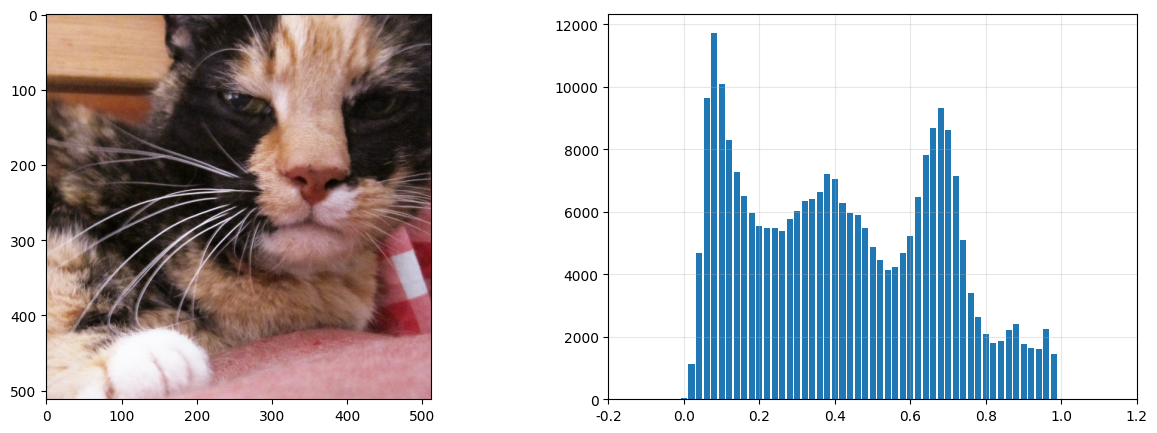

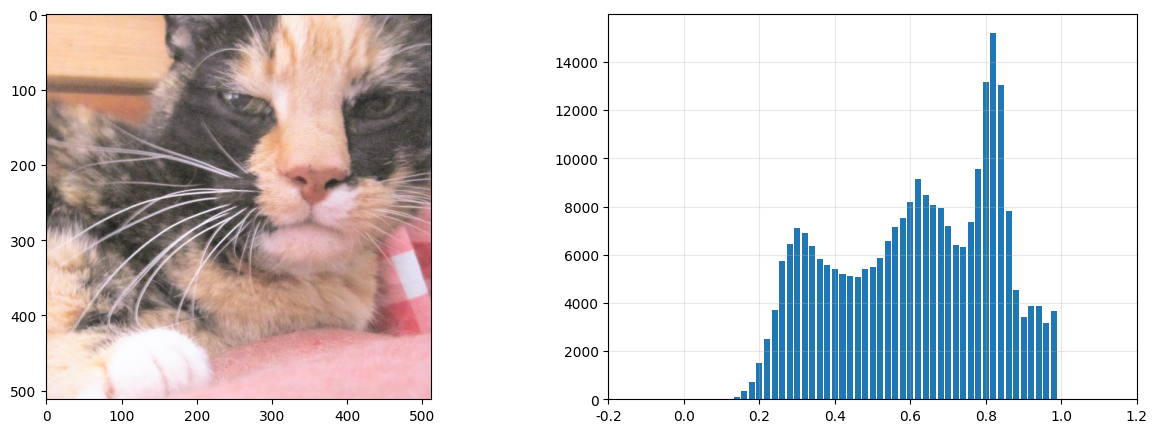

In [13]:
#@title Gráfico de la imagen original y modificada junto a sus histogramas
# para ingresar a la función según el filtro (lineal a trozos)
if (filtro.value == 'lineal a trozos'):
  dom = np.array(x_range.value)
  dom = np.append(dom, [y_min.value, y_max.value] )
elif(filtro.value == 'potencia'):
  dom = potencia.value
else:
  dom = 0.

# Imagen original y modificada junto a sus histogramas
plot_comparativa(img, 'RGB', filtro.value, dom)


# Ejercicios Optativos. Ver presentación para más detalle
Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.

##Ejercicio 1.3 (optativo)

La propuesta para esta actividad consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris. Por lo tanto creamos un mapa de altitud y lo visualizamos en dos tipos de escalas (grises y la arco iris).

### Imagen Mapa de calor Cuerpo Humano

Elegimos una imagen de un mapa de calor dependiendo el estado de ánimo y lo trasformamos a escala de grises y escala de colores Arco Iris


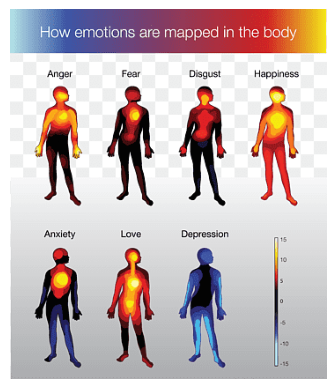

In [14]:


# Ruta de la imagen PNG
ruta_imagen = '/content/Cuerpo_humano.png'
#'https://github.com/sebascoca/DiploDatos2023/blob/2914db8536255444a4a6fce3f7788306eb40b5c8/Procesamiento_de_imagenes/tp/Cuerpo_humano.png'
#'/content/drive/Shared drives/DiploDatos-G32/optativas/Procesamiento_Imagenes/entregable/data1/Cuerpo_humano.png'

# Cargar la imagen desde la ruta
imagen_CH = imread(ruta_imagen)
#imagen_CH = np.array(PIL.Image.open(urllib.request.urlopen(ruta_imagen)))

# Mostrar la imagen
plt.imshow(imagen_CH)
plt.axis('off')  # Desactiva los ejes (opcional)
plt.show()

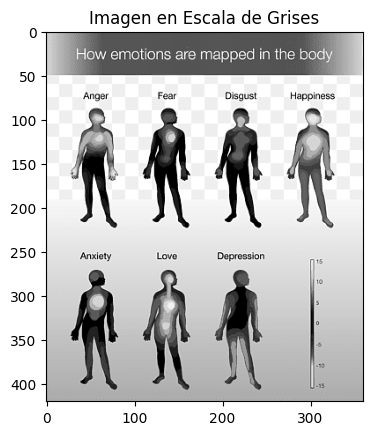

In [15]:
imagen_CH = imread(ruta_imagen)
# Convertir la imagen a escala de grises
img_CH_gris = cv2.cvtColor(imagen_CH, cv2.COLOR_RGB2GRAY)
img_CH_gris_01 = img_gris / 255
# Mostrar la imagen en escala de grises
plt.imshow(img_CH_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
#plt.axis('off')  # Deshabilitar ejes
plt.show()

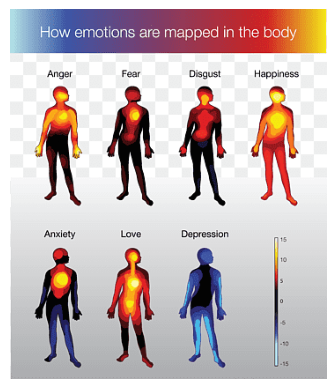

In [16]:
imagen_CH = imread(ruta_imagen)
# Convertir la imagen a escala de AI
img_CH_AI = cv2.cvtColor(imagen_CH, cv2.COLORMAP_RAINBOW)
img_CH_AI_01 = img_CH_AI / 255

imagen_arcoiris_rgb = cv2.cvtColor(img_CH_AI, cv2.COLORMAP_RAINBOW)

# Muestra la imagen en colores de arcoíris
plt.imshow(imagen_arcoiris_rgb)
plt.axis('off')  # Desactiva los ejes
plt.show()



### Creamos un mapa de altitud para presentarlo en escala de Grises y escala de colores Arcoiris

In [17]:
# Genera una matriz de altitud de ejemplo (10x10)
altitud = np.random.rand(10, 10) * 1000

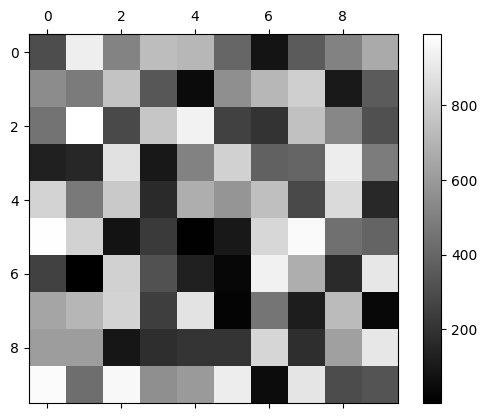

In [18]:
# Crea una figura y un eje
fig, ax = plt.subplots()

# Dibuja el mapa de altitud en escala de grises
cax = ax.matshow(altitud, cmap='gray')

# Agrega una barra de color para la escala de grises
cbar = fig.colorbar(cax)

# Muestra el mapa en escala de grises
plt.show()



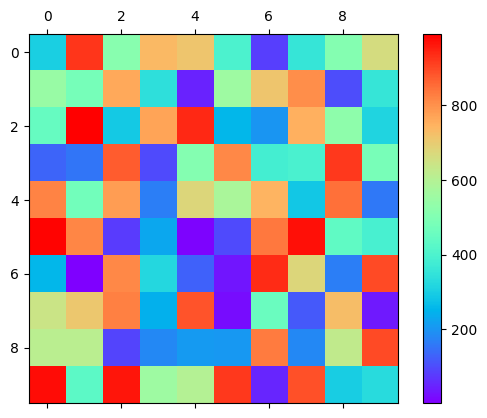

In [19]:
# Crea una figura y un eje
fig, ax = plt.subplots()

# Dibuja el mapa de altitud en color arcoíris
cax = ax.matshow(altitud, cmap='rainbow')

# Agrega una barra de color para la escala de colores
cbar = fig.colorbar(cax)

# Muestra el mapa en color arcoíris
plt.show()


##Ejercicio 2.3

Desarrollar un aplicativo o notebook que implemente las siguientes funciones:
- Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar
el efecto) utilizando kernel constante, bilineal, y bicúbico.
- Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el
efecto) utilizando kernel constante, bilineal, y bicúbico.
- Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.

In [20]:
#@title Transformaciones

# ============
# DownSampling

def ds_cte(img, factor):
    """
    Downsampling con kernel constante
    ingresa img y factor, salida new_img
    """
    # Calcula las dimensiones de la imagen de entrada y de salida
    height, width, channels = img.shape
    new_height = np.int16(height / factor)
    new_width = np.int16(width / factor)
    # Calcula el tamaño del grupo de píxeles para el promedio
    group_size_x = np.int16(factor)
    group_size_y = np.int16(factor)
    # Crea una matriz vacía para la imagen de salida
    new_img = np.empty((new_height, new_width, channels), dtype=img.dtype)
    # Realiza el downsampling con kernel constante (promedio)
    for i in range(new_height):
        for j in range(new_width):
            x0 = j * group_size_x
            y0 = i * group_size_y
            x1 = np.min([x0 + group_size_x, width])
            y1 = np.min([y0 + group_size_y, height])
            group_pixels = img[y0:y1, x0:x1]
            for c in range(channels):
                pixel_value = np.int16(np.mean(group_pixels[:, :, c]))
                new_img[i, j, c] = np.clip(pixel_value, RGBlim[0], RGBlim[1])
    return new_img

def ds_bl(img, factor):
    """
    Downsampling con kernel bilineal
    ingresa img y factor, salida new_img
    """
    # Calcula las dimensiones de la imagen de entrada y de salida
    height, width, channels = img.shape
    new_height = np.int16(height / factor)
    new_width = np.int16(width / factor)
    # Crear una matriz vacía para la imagen de salida
    new_img = np.empty((new_height, new_width, channels), dtype=img.dtype)
    # Calcular los factores de escala en x e y
    scale_x = width / new_width
    scale_y = height / new_height
    # Realizar el downsampling bilineal
    for i in range(new_height):
        for j in range(new_width):
            x = j * scale_x
            y = i * scale_y
            x0 = np.int16(x)
            y0 = np.int16(y)
            dx = x - x0
            dy = y - y0
            for c in range(channels):
                pixel_value = (1 - dx) * (1 - dy) * img[y0, x0, c]
                if x0 + 1 < width:
                    pixel_value += dx * (1 - dy) * img[y0, x0 + 1, c]
                if y0 + 1 < height:
                    pixel_value += (1 - dx) * dy * img[y0 + 1, x0, c]
                if x0 + 1 < width and y0 + 1 < height:
                    pixel_value += dx * dy * img[y0 + 1, x0 + 1, c]
                new_img[i, j, c] = np.clip(pixel_value, RGBlim[0], RGBlim[1])
    return new_img

def ds_bc(img, factor):
    """
    Downsampling con kernel bicúbico
    ingresa img y factor, salida new_img
    """
    # Calcula las dimensiones de la imagen de entrada y de salida
    height, width, channels = img.shape
    new_height = np.int16(height / factor)
    new_width = np.int16(width / factor)
    # Crear una matriz vacía para la imagen de salida
    new_img = np.empty((new_height, new_width, channels), dtype=img.dtype)
    # Calcular los factores de escala en x e y
    scale_x = width / new_width
    scale_y = height / new_height
    # Realizar el downsampling bicúbico
    for i in range(new_height):
        for j in range(new_width):
            x = j * scale_x
            y = i * scale_y
            x0 = np.int16(x)
            y0 = np.int16(y)
            dx = x - x0
            dy = y - y0
            for c in range(channels):
                pixel_value = 0
                for m in range(-1, 3):
                    for n in range(-1, 3):
                        px = np.min([np.max([x0 + m, 0]), width - 1])
                        py = np.min([np.max([y0 + n, 0]), height - 1])
                        weight_x = np.max([1 - np.abs(x0 + m - x), 0])
                        weight_y = np.max([1 - np.abs(y0 + n - y), 0])
                        pixel_value += img[py, px, c] * weight_x * weight_y
                new_img[i, j, c] = np.clip(pixel_value, RGBlim[0], RGBlim[1])
    return new_img

def ds(img, metodo, factor):
    """
    Función que contempla los 3 métodos de Downsampling
    ingresan imagen (img), método y el factor
    salida imagen redimensionada (new_img)
    """
    #factor = 2
    # Verifica el método seleccionado y realiza el downsampling correspondiente
    if (metodo == 'constante'):
        new_img = ds_cte(img, factor)
    elif (metodo == 'bilineal'):
      new_img = ds_bl(img, factor)
    elif (metodo == 'bicubico'):
      new_img = ds_bc(img, factor)
    else:
        print("Método de downsampling no válido")
    return new_img


# ==========
# UpSampling

def us_cte(img, factor):
    """
    Upsampling con kernel constante
    ingresa img y factor, salida new_img
    """
    # Calcula las dimensiones de la imagen de entrada y de salida
    height, width, channels = img.shape
    new_height = np.int16(height * factor)
    new_width = np.int16(width * factor)
    # Realiza el upsampling con kernel constante (repetición de píxeles) utilizando NumPy
    new_img = np.empty((new_height, new_width, channels), dtype=img.dtype)
    for i in range(new_height):
        for j in range(new_width):
            x = np.int16(j / factor)
            y = np.int16(i / factor)
            for c in range(channels):
                new_img[i, j, c] = img[y, x, c]
    return new_img

def us_bl(img, factor):
    """
    Upsampling con kernel bilineal
    ingresa img y factor, salida new_img
    """
    # Calcula las dimensiones de la imagen de entrada y de salida
    height, width, channels = img.shape
    new_height = np.int16(height * factor)
    new_width = np.int16(width * factor)
    # Realiza el upsampling bilineal utilizando NumPy
    new_img = np.empty((new_height, new_width, channels), dtype=img.dtype)
    for i in range(new_height):
        for j in range(new_width):
            x = j / factor
            y = i / factor
            x0 = np.int16(x)
            y0 = np.int16(y)
            dx = x - x0
            dy = y - y0
            for c in range(channels):
                pixel_value = (1 - dx) * (1 - dy) * img[y0, x0, c]
                if x0 + 1 < width:
                    pixel_value += dx * (1 - dy) * img[y0, x0 + 1, c]
                if y0 + 1 < height:
                    pixel_value += (1 - dx) * dy * img[y0 + 1, x0, c]
                if x0 + 1 < width and y0 + 1 < height:
                    pixel_value += dx * dy * img[y0 + 1, x0 + 1, c]
                new_img[i, j, c] = np.clip(pixel_value, RGBlim[0], RGBlim[1])
    return new_img

def us_bc(img, factor):
    """
    Upsampling con kernel bicúbico
    ingresa img y factor, salida new_img
    """
    # Calcula las dimensiones de la imagen de entrada y de salida
    height, width, channels = img.shape
    new_height = np.int16(height * factor)
    new_width = np.int16(width * factor)
    # Crear una matriz vacía para la imagen de salida
    new_img = np.empty((new_height, new_width, channels), dtype=img.dtype)
    # Calcular los factores de escala en x e y
    scale_x = width / new_width
    scale_y = height / new_height
    # Realizar el upsampling bicúbico
    for i in range(new_height):
        for j in range(new_width):
            x = j * scale_x
            y = i * scale_y
            x0 = np.int16(x)
            y0 = np.int16(y)
            dx = x - x0
            dy = y - y0
            for c in range(channels):
                pixel_value = 0
                for m in range(-1, 3):
                    for n in range(-1, 3):
                        px = np.min([np.max([x0 + m, 0]), width - 1])
                        py = np.min([np.max([y0 + n, 0]), height - 1])
                        weight_x = np.max([1 - np.abs(x0 + m - x), 0])
                        weight_y = np.max([1 - np.abs(y0 + n - y), 0])
                        pixel_value += img[py, px, c] * weight_x * weight_y
                new_img[i, j, c] = np.clip(pixel_value, RGBlim[0], RGBlim[1])
    return new_img

def us(img, metodo, factor):
    """
    Función que contempla los 3 métodos de Upsampling
    ingresan imagen (img), método y el factor
    salida imagen redimensionada (new_img)
    """
    #factor = 2
    # Verifica el método seleccionado y realiza el downsampling correspondiente
    if (metodo == 'constante'):
        new_img = us_cte(img, factor)
    elif (metodo == 'bilineal'):
      new_img = us_bl(img, factor)
    elif (metodo == 'bicubico'):
      new_img = us_bc(img, factor)
    else:
        print("Método de downsampling no válido")
    return new_img

# ============
# Cuantización

# Sólo se realiza con imágenes en escala de gris

def uniforme(img, levels):
    """
    Función que realiza una cuantización uniforme sobre la imagen (canal Y)
    ingresan img y levels, salida new_img
    """
    # Verifica del formato de la imagen
    if img.ndim > 2:
      print("La imagen a ingresar debe ser en escala de gris (canal Y)")
    # Verifica que la cantidad de niveles sea válida
    if levels < 2 or levels > 256:
        print("La cantidad de niveles debe ser superior a 2 e inferior a 256")
    # Calcula el paso entre niveles de gris
    step = 256 // levels
    # Realiza la cuantización uniforme
    new_img = np.floor_divide(img, step) * step
    return new_img

def dithering_random(img, levels):
    """
    Función que realiza una cuantización por dithering aleatorio sobre la
    imagen (canal Y)
    ingresan img y levels, salida dithering_img
    """
    # Verifica del formato de la imagen
    if img.ndim > 2:
      print("La imagen a ingresar debe ser en escala de gris (canal Y)")
    # Verifica que la cantidad de niveles sea válida
    if levels < 2 or levels > 256:
        print("La cantidad de niveles debe ser superior a 2 e inferior a 256")
    # Calcula el paso entre niveles de gris
    step = 256 / levels
    # Aplica dithering aleatorio en el canal Y
    dithered_img = img + np.random.uniform(-step/2, step/2, img.shape)
    # Asegurarse de que los valores estén en el rango [0, 255]
    dithered_img = np.clip(dithered_img, RGBlim[0], RGBlim[1])
    # Actualiza el canal Y en la imagen YIQ
    return dithered_img

def scan_line(img):
    """
    Función que realiza una cuantización por scan-line sobre la
    imagen (canal Y)
    ingresan img y levels, salida new_img
    """
    height, width = img.shape
    # Crear una copia de img (canal Y) para guardar el resultado
    new_img = img.copy()
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_value = new_img[y, x]
            new_value = np.round(old_value / 255) * 255  # Cuantizar el valor
            new_img[y, x] = new_value
            error = old_value - new_value
            # Distribuir el error a los píxeles vecinos
            new_img[y, x + 1] += error * 7 / 16
            new_img[y + 1, x - 1] += error * 3 / 16
            new_img[y + 1, x] += error * 5 / 16
            new_img[y + 1, x + 1] += error * 1 / 16
    return new_img

def cuantizacion(img, tipo, levels=None):
    if tipo == "uniforme":
        if levels is None: # por si no se indica el nivel
            print("Necesitas especificar el número de niveles para la cuantización uniforme.")
        new_img = uniforme(img, levels)
    elif tipo == "dithering aleatorio":
        if levels is None: # por si no se indica el nivel
          print("Necesitas especificar el número de niveles para la cuantización uniforme.")
        new_img = dithering_random(img, levels)
    elif tipo == "scan-line":
        new_img = scan_line(img)
    else:
        print("Tipo de cuantización no válido. Utiliza 'uniforme', 'dithering aleatorio' o 'scan-line'.")
    return new_img


# Proceso general
def procesado(img, filtro, tipo, nivel):
  if filtro == "DownSampling":
    new_img = ds(img, tipo, nivel)
  elif filtro == "UpSampling":
    new_img = us(img, tipo, nivel)
  elif filtro == "Cuantización":
    new_img = cuantizacion(img, tipo, nivel)
  else:
    print("Seleccionar un filtro y sus características")
  return new_img


In [21]:
#@title Selección del tipo de transformación y sus características (para desplegar las opciones del DownSampling, seleccionar otro y volver al DownSampling)

# widget de filtro

proceso = widgets.ToggleButtons(
    options=['Redimensionar', 'Cuantizar'],
    description='Proceso:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
#    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)
filtro = widgets.Dropdown(
    options=["DownSampling", "UpSampling", "Cuantización"],
    value='DownSampling',
    description='Filtro: ',
    disable=False,
    )

# widgets de características
metodo = widgets.Dropdown(
    options=["constante", "bilineal", "bicubico"],
    value='constante',
    description='Método: ',
    disable=False,
    )
factor = widgets.FloatSlider(
    value=2,
    min=0.01,
    max=10.,
    step=0.01,
    description='Factor:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    )
tipo = widgets.Dropdown(
    options=["uniforme", "dithering aleatorio", "scan-line"],
    value='uniforme',
    description='Tipo: ',
    disable=False,
    )
#levels = widgets.BoundedFloatText(
#    value=2,
#    min=2,
#    max=256,
#    step=1,
#    description='Nivel:',
#    disabled=False
#    )
levels = widgets.FloatSlider(
    value=2,
    min=2,
    max=256,
    step=1,
    description='Nivel:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
    )

# muestro el widget de filtro
display(filtro)


# intialize the output - second widget
out = widgets.Output()

def changed_img(change):
    '''
    Monitor change in the first widget
    '''
    global out
    if filtro.value == 'DownSampling':
      out.clear_output() #clear output
      out = widgets.Output() # redefine output
      out.append_display_data(metodo)
      out.append_display_data(factor)
      display(out)
    elif filtro.value == 'Cuantización':
      out.clear_output() #clear output
      out = widgets.Output() # redefine output
      out.append_display_data(tipo)
      out.append_display_data(levels)
      display(out)
    elif filtro.value == "UpSampling":
      out.clear_output() #clear output
      out = widgets.Output() # redefine output
      out.append_display_data(metodo)
      out.append_display_data(factor)
      display(out)
    #else:
    #  out.clear_output() #clear output
    #  out = widgets.Output() # redefine output


# monitor the friends widget for changes
filtro.observe(changed_img, 'value')

Dropdown(description='Filtro: ', options=('DownSampling', 'UpSampling', 'Cuantización'), value='DownSampling')

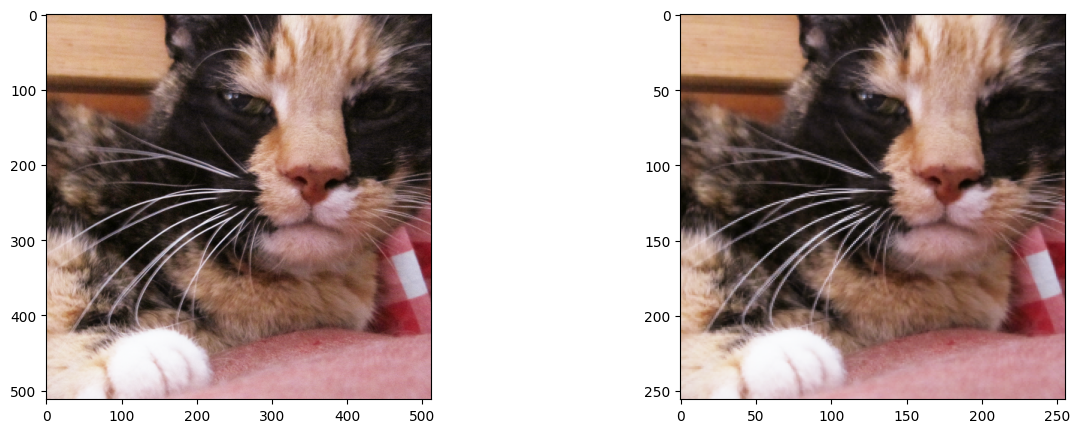

In [22]:
#@title Gráfico de la imagen original y procesada

def plot_comparativa_sh(img_orig, filtro, tipo, nivel):
  """
  Gráfico comparativo entre la imagen original y la modificada por el filtro
  Ingresan la imagen, filtro, tipo/métdo y nivel/factor
  """
  new_img = procesado(img_orig, filtro, tipo, nivel)
  _, axes = plt.subplots(1, 2, figsize=(15,5))#, constrained_layout=True)
  axes[0].imshow(img_orig, 'gray')#, vmin=0, vmax=1)
  # se pasa imagen RGB o canal Y
  axes[1].imshow(new_img, 'gray')#, aspect='auto')#, vmin=0, vmax=1)
  #axes[1].set_aspect('equal', 'box')
  plt.show()

if filtro.value == "DownSampling":
  tipos = metodo.value
  nivel = factor.value
  imagen = img
elif filtro.value == "UpSampling":
  tipos = metodo.value
  nivel = factor.value
  imagen = img
elif filtro.value == "Cuantización":
  tipos = tipo.value
  nivel = levels.value
  imagen = rgb2yiq(img)[:,:,0]

plot_comparativa_sh(imagen, filtro.value, tipos, nivel )
